In [1]:
import pathlib
path = pathlib.Path("logs")
path.mkdir(parents=True, exist_ok=True)

In [1]:
from model.dqn import DQNScheduler
from env import IaaS , Workload
from env.workflow import Workflow
from rdwsEnv import runEnv
import pickle
import torch
import torch.nn as nn
import datetime
import time  
from model.sac import SAC

    
random_seed = 50
memory_size = 1000
batch_size = 256
target_update = 100
action_num = 16
state_dim =  6+3*action_num 
# 将某个事件的到达率从每分钟 0.1 次转换为每秒的到达率
arrival_rate = 0.1/60
train_path = 'train100'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
episode_number = 100
wf_number = 10


def train(episode_number, workflow_number, agent, train_wf_path, arrival_rate):
  mean_makespan = [];
  mean_cost = []
  time_rate = []
  cost_rate = []
  succes_both_rate = []
  episode_arr = []


  agent.dqn_net.train(True);
  print("start at:", str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")));
  start = time.time();
        
  for episode in range(1, episode_number+1):
    # Workflow.reset() 是一个静态方法，专门用于将 Workflow.counter 重置为 0
    # 不会自动触发 Workflow 类的初始化，也不会影响你是否已经创建了实例
    Workflow.reset();
    IaaS.reset();
    Workload.reset();
  
    print("episode:",episode,"="*70)

    t, c, tr, cr, both = runEnv(train_wf_path, agent.schedule, episode*10, wf_number=workflow_number, action_num = agent.action_num, 
                                  
                                  arrival_rate = arrival_rate, merge = False, debug=False);
    mean_makespan.append(t)
    mean_cost.append(c)
    time_rate.append(tr)
    cost_rate.append(cr)
    succes_both_rate.append(both)
    episode_arr += ([episode])
    
        
  s = str(datetime.timedelta(seconds=time.time()-start));
  print("total train time:", s);
  torch.save(agent.state_dict(), "model.pth")
  
  str1 = 'episode_number: {}\nwf_number: {}\npath: {}\nrandom_seed: {}\ntotal run time: {}'.format(
            episode_number, workflow_number, train_wf_path, random_seed, s);
  
  agent.trainSave(more_text=str1, 
                  mean_makespan= mean_makespan, 
                  mean_cost=mean_cost,
                 succes_deadline_rate=time_rate, 
                  succes_budget_rate=cost_rate,
                 succes_both_rate = succes_both_rate);


agent = DQNScheduler(action_num, state_dim, memory_size, batch_size, target_update,
                      discount_factor = 0.5,
                       reward_num = 2,
                       alpha = 0.5
);

# agent2 = SAC(state_dim=state_dim, action_num=action_num, batch_size=batch_size, buffer_size=memory_size, device=device, debug=False)

# setRandSeed(random_seed);
train(episode_number, wf_number, agent, "workflows/"+train_path, arrival_rate);

DQN: device is cuda:0
start at: 2024-09-21 19:59:46
episode: 1 ======================================================================
[Deadline] wf.id: wf1, wf.deadline = 131578.01, wf.makespan = 689744.34, distance = -558166.33
[Deadline] wf.id: wf4, wf.deadline = 66213.60, wf.makespan = 808074.09, distance = -741860.49
[Deadline] wf.id: wf3, wf.deadline = 77541.56, wf.makespan = 809686.40, distance = -732144.84
[Deadline] wf.id: wf9, wf.deadline = 133212.77, wf.makespan = 912253.36, distance = -779040.59
[Deadline] wf.id: wf8, wf.deadline = 155402.51, wf.makespan = 964226.09, distance = -808823.58
[Deadline] wf.id: wf6, wf.deadline = 81718.39, wf.makespan = 969499.47, distance = -887781.08
[Deadline] wf.id: wf2, wf.deadline = 196511.16, wf.makespan = 1087059.81, distance = -890548.65
[Deadline] wf.id: wf7, wf.deadline = 10947.01, wf.makespan = 1195253.09, distance = -1184306.08
[Deadline] wf.id: wf5, wf.deadline = 43941.61, wf.makespan = 1219366.20, distance = -1175424.59
[Deadline] 

KeyboardInterrupt: 

In [ ]:
#------------------------------------------------------
# agent = DQNScheduler(action_num, state_dim, memory_size, batch_size, target_update,
#                       discount_factor = 0.5,
#                        reward_num = 1,
#                        alpha = 0.7
# );

# setRandSeed(random_seed);
# train(episode_number, wf_number, agent, "workflows/"+train_path, arrival_rate);

# #--------------------------------------------------------

# agent = DQNScheduler(action_num, state_dim, memory_size, batch_size, target_update,
#                       discount_factor = 0.5,
#                        reward_num = 2,
#                        alpha = 0.5
# );

# setRandSeed(random_seed);
# train(episode_number, wf_number, agent, "workflows/"+train_path, arrival_rate);
# #--------------------------------------------------------

# agent = DQNScheduler(action_num, state_dim, memory_size, batch_size, target_update,
#                       discount_factor = 0.5,
#                        reward_num = 2,
#                        alpha = 0.7
# );

# setRandSeed(random_seed);
# train(episode_number, wf_number, agent, "workflows/"+train_path, arrival_rate);


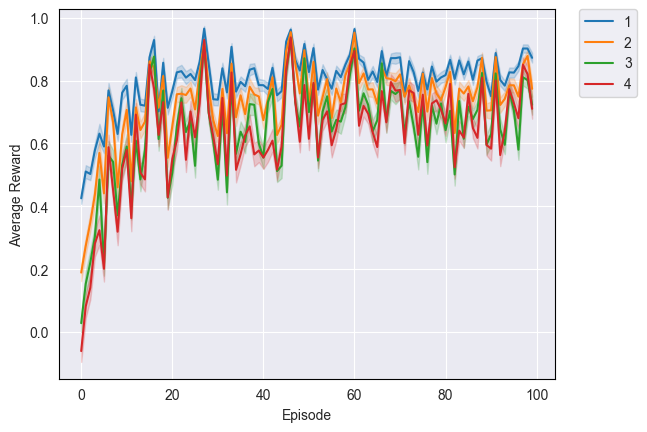

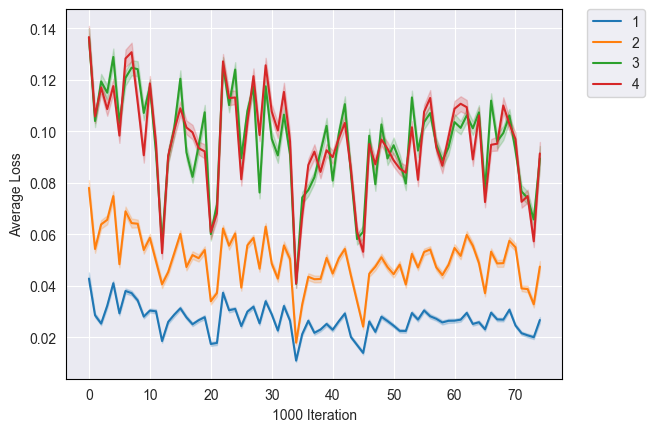

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import datetime

with open("logs/1", "rb") as f:
  a1 = pickle.load(f);

with open("logs/2", "rb") as f:
  a2 = pickle.load(f);
  
with open("logs/3", "rb") as f:
  a3 = pickle.load(f);
  
with open("logs/4", "rb") as f:
  a4 = pickle.load(f); 



sbn.set_style("darkgrid", {'axes.grid' : True,
                              'axes.edgecolor':'black',
                              })


avg = 5000
data = {'episode':  a1.update + a2.update + a3.update+ a4.update,
        'rnum':  (["1"]*len(a1.update) + ["2"]*len(a2.update)+["3"]*len(a3.update)+["4"]*len(a4.update)),
        'reward':  a1.all_rewards + a2.all_rewards + a3.all_rewards+ a4.all_rewards,
       }
data_frame = pd.DataFrame(data) 
time_str = str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M "))

ax = sbn.lineplot(data=data_frame, x="episode", y="reward", hue="rnum")
ax.set(ylabel="Average Reward", xlabel= "Episode")#str(avg)+" Step")
ax.legend(loc='upper left',
          title='Discount Factor',
#            facecolor= 'white',
          frameon=False
         )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("logs/"+time_str+'rrrr.png', facecolor='w'); #transparent=False
plt.show()
plt.clf();


l = len(a1.all_losses)
avg = 1000
data = {'loss': a1.all_losses + a2.all_losses+ a3.all_losses + a4.all_losses,
        'rnum':  (["1"]*len(a1.all_losses) + ["2"]*len(a2.all_losses)+
        ["3"]*len(a3.all_losses)+["4"]*len(a4.all_losses)),
        'x': [int(i/avg) for i in range(l)]*4, 
       }
data_frame = pd.DataFrame(data) 

ax = sbn.lineplot(data=data_frame, x="x", y="loss", hue="rnum") #, alpha=0.1)
ax.set(ylabel="Average Loss", xlabel=str(avg)+" Iteration")
ax.legend(loc='upper right',
          title='Discount Factor',
#            facecolor= 'white',
          frameon=False
         )
# ax.margins(x=0)
# leg = ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("logs/"+time_str+'_com_loss_.png', facecolor='w'); #transparent=False
plt.show()
plt.clf();

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime

def test(episode_number, workflowf_number, scheduler, test_wf_path, file, seed, arrival_rate = 1, method="", merge=False):
  makespan = [];
  cost = []
  cost_rate = []
  time_rate = []
  succes_both = []
  
  setRandSeed(seed);
  print(test_wf_path)
  print("start at:", str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")));
  start = time.time();
  
  for episode in range(1, episode_number+1):
    print("episode:", episode, method, "wf num:", workflowf_number, "-------------------------------")
    Workflow.reset();
    IaaS.reset();
    Workload.reset();
    
    t, c, dsr, bsr, both = runEnv(test_wf_path, scheduler, seed*episode, wf_number=workflowf_number,
                                  arrival_rate = arrival_rate,
                                  constant_df=0, constant_bf= 0,
                                  merge=merge, debug=False);
    makespan += t
    cost += c
    time_rate += dsr
    cost_rate += bsr
    succes_both +=both

  
      
#   with open(file,'a') as f:
#     f.write("df:" + str(episode) +test_wf_path +" : " + str(t) + str(c) + str(dsr)+ str(bsr) +  str(both) + "  :"+ method + "\n");
    
  st = str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M "));
  print('='*70);
  s = str(datetime.timedelta(seconds=time.time()-start));
  print("total run time:", s);
  return makespan, cost, time_rate, cost_rate, succes_both



task_num = []
rnum = []
makespan = [];
cost = []
time_rate = []
cost_rate = []
succes_both = []

setRandSeed(18);

sbn.set_style("whitegrid", {'axes.grid' : True, 'axes.edgecolor':'black'})

title = ""
episode_num = 100
wf_num = 10

file = "logs/"+str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M_"))+'montage_test.txt';
wf_dir = "workflows/test100"

for n in [0.1, 0.5, 1]:
    
    ar = n/60

    with open('logs/1','rb') as f:
      agent = pickle.load(f);
      agent.dqn_net.train(False);
    t, c, dsr, bsr, both = test(episode_num, wf_num, agent.schedule, wf_dir, file, int(n+1)*10, arrival_rate = ar, method="reward 0", merge=0)
    makespan += t
    cost += c
    time_rate += dsr
    cost_rate += bsr 
    succes_both += both
    task_num += [str(n)]*len(both)
    rnum += ["1"]*len(both)
    
    
    with open('logs/2','rb') as f:
      agent = pickle.load(f);
      agent.dqn_net.train(False);
    t, c, dsr, bsr, both = test(episode_num, wf_num, agent.schedule, wf_dir, file, int(n+1)*10, arrival_rate = ar, method="reward 0", merge=0)
    makespan += t
    cost += c
    time_rate += dsr
    cost_rate += bsr 
    succes_both += both
    task_num += [str(n)]*len(both)
    rnum += ["2"]*len(both)
    
    with open('logs/3','rb') as f:
      agent = pickle.load(f);
      agent.dqn_net.train(False);
    t, c, dsr, bsr, both = test(episode_num, wf_num, agent.schedule, wf_dir, file, int(n+1)*10, arrival_rate = ar, method="reward 1 0.5", merge=0)

    makespan += t
    cost += c
    time_rate += dsr
    cost_rate += bsr 
    succes_both += both
    task_num += [str(n)]*len(both)
    rnum += ["3"]*len(both)
    
    
    with open('logs/4','rb') as f:
      agent = pickle.load(f);
      agent.dqn_net.train(False);
    t, c, dsr, bsr, both = test(episode_num, wf_num, agent.schedule, wf_dir, file, int(n+1)*10, arrival_rate = ar, method="reward 1 0.5", merge=0)

    makespan += t
    cost += c
    time_rate += dsr
    cost_rate += bsr 
    succes_both += both
    task_num += [str(n)]*len(both)
    rnum += ["4"]*len(both)
    

data = {
    'tasknum': task_num,
    'rnum': rnum,
    'makespan': makespan, 
    'cost': cost, 
    'time_rate': time_rate, 
    'cost_rate': cost_rate, 
    'succes_both': succes_both, 
   }

data_frame = pd.DataFrame(data) 

###############################################################  

ax = sbn.boxplot(x="tasknum", y="time_rate", hue="rnum", showfliers = False, 
                  data=data, linewidth=1).set(
    xlabel='Arrival Rate Per Minute', 
    ylabel='Time Rate'
)
plt.legend([],[], frameon=False)
plt.legend(loc='upper left')
# ax.set_axis_labels("Number of Tasks", "Deadline Success Rate")
plt.legend(
#   loc='upper left',
    title='reward type',
#            facecolor= 'white',
#           frameon=False
   )
# plt.title(title.title())
time_str = str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M "))
plt.savefig("logs/"+time_str+title+'_com_dsr.png', facecolor='w'); #transparent=False
plt.show()
plt.clf();
###############################################################  
ax = sbn.boxplot(x="tasknum", y="cost_rate", hue="rnum", showfliers = False, 
                  data=data, linewidth=1).set(
    xlabel='Arrival Rate Per Minute', 
    ylabel='Cost Rate'
)

plt.legend([],[], frameon=False)
plt.legend(
#   loc='upper left',
    title='reward type',
#            facecolor= 'white',
#           frameon=False
   )
plt.legend(loc='upper right')

# plt.title(title.title())
time_str = str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M "))
plt.savefig("logs/"+time_str+title+'_com_bsr.png', facecolor='w'); #transparent=False
plt.show()
plt.clf();

# ###############################################################  
ax = sbn.catplot(
data=data_frame, kind="bar", legend = False,
x="tasknum", y="succes_both", hue="rnum",
 palette="bright", ci='sd')
#ci=None, 
#, palette="dark", alpha=.6, height=6
ax.despine(left=True)
# plt.legend(loc='upper left')
plt.legend([],[], frameon=False)
#  deep, muted, pastel, bright, dark, and colorblind
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(title.title(), fontsize=16)

ax.set_axis_labels("Arrival Rate Per Minute", "Success Rate")
plt.legend(
  loc='upper right',
    title='reward type',
#            facecolor= 'white',
#           frameon=False
   )
#   plt.title(title.title())
time_str = str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M "))
plt.savefig("logs/"+time_str+title+'_com_bothdf4.png', facecolor='w'); #transparent=False
plt.show()
plt.clf();
